#**Credit Card Fraud Detection using Random Forest**

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('creditcard.csv')
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

##Data Preprocessing

In [ ]:
dataset.shape

(34958, 31)

In [ ]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
dataset=dataset.dropna()
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[ 1.09570000e+04  1.38967028e+00 -1.24097588e-01 ...  7.18980300e-03
   3.90063490e-02  1.59500000e+01]
 [ 3.44100000e+03 -4.16841981e-01  9.03694381e-01 ...  2.46452795e-01
   7.88792750e-02  9.72000000e+00]
 [ 2.02890000e+04 -2.93566945e-01  1.03878660e+00 ...  1.01678706e-01
   1.40522309e-01  1.98000000e+00]
 ...
 [ 3.59070000e+04  1.02752802e+00 -1.01677972e+00 ... -4.78250800e-03
   3.45503590e-02  1.31940000e+02]
 [ 3.15520000e+04  4.58760954e-01 -2.05014394e+00 ... -1.65921792e-01
   8.18691120e-02  4.96740000e+02]
 [ 2.27000000e+03 -2.18120429e+00  1.50552841e+00 ...  2.80962937e-01
   7.40571250e-02  1.39800000e+01]]


In [ ]:
print(y_train)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(X_test)

[[ 3.55260000e+04 -2.69937076e+00  2.65035577e+00 ... -1.14558693e+00
  -2.14393509e-01  3.03000000e+00]
 [ 9.10200000e+03  9.08928071e-01 -2.10439554e-01 ... -4.87345060e-02
   4.14834200e-02  2.04490000e+02]
 [ 3.69570000e+04 -1.35212686e+00  1.82775388e+00 ... -7.28147600e-03
   2.62516962e-01  8.69000000e+01]
 ...
 [ 4.87000000e+02  1.74857320e-01  2.03555032e+00 ...  4.09370788e-01
  -4.20750510e-02  8.99000000e+00]
 [ 2.55620000e+04 -2.84782019e-01  8.56411781e-01 ...  2.47602846e-01
   9.10346290e-02  1.29000000e+00]
 [ 3.32090000e+04  1.57973759e-01 -3.13572131e-01 ...  1.32434250e-01
   2.28213257e-01  8.00800000e+01]]


In [ ]:
print(y_test)

[0. 0. 0. ... 0. 0. 0.]


## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[8710    0]
 [   7   23]]


0.9991990846681922

## Visualising the Test set results

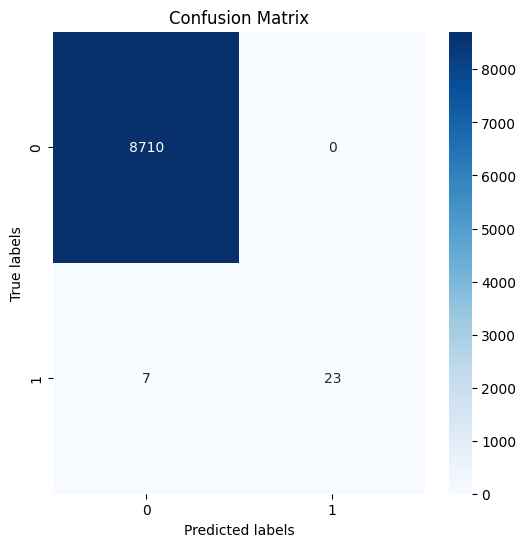

Accuracy: 0.9991990846681922


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)